# Increase customer retention with A/B testing


-----

## Data
Data is (https://www.kaggle.com/yufengsui/mobile-games-ab-testing)

 * **userid** - An identification number that identifies individual users.
  * **version** - You can see which user belongs to the experimental group or control group. (gate_30, gate_40)
  * **sum_gamerounds** - Number of rounds played by users in 14 days after first install.
  * **retention_1** - Whether the user returned within 1 day of installation.
  * **retention_7** - Whether the user returned within 7 days of installation.
 

-----

## problem definition
  * In the Cookie Cats game, when a specific stage is reached, the stage is locked.
  * In case of Area Locked, you can get 3 keys by playing a special edition game to get Keys, ask a Facebook friend, or purchase a paid item and open it immediately.
  * When locking in the stage at which stage, it is necessary to decide which is best for user retention.

-----

### Data exploration

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv('Data/cookie_cats.csv')
print(df.shape)
df.tail() 

(90189, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [29]:
df.groupby("version").count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


<AxesSubplot:ylabel='sum_gamerounds'>

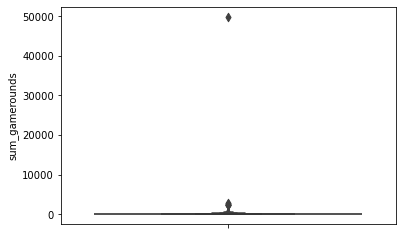

In [30]:
sns.boxenplot(data=df, y="sum_gamerounds")

In [31]:
df.loc[df["sum_gamerounds"] > 45000]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [32]:
# Remove users who have played more than 45000. 
df = df[df["sum_gamerounds"] < 45000 ]
print(df.shape)
df.tail()

(90188, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [33]:
# Look at the percentile.
df["sum_gamerounds"].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

<AxesSubplot:ylabel='sum_gamerounds'>

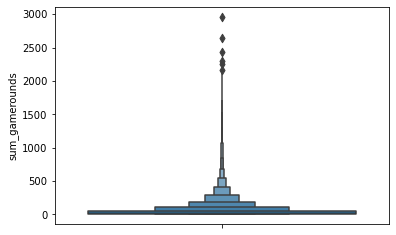

In [34]:
sns.boxenplot(data=df, y="sum_gamerounds")

-----

### Data analysis

In [35]:
# 각 게임실행횟수 별 유저의 수를 카운트 해봅니다. 
plot_df = df.groupby("sum_gamerounds")["userid"].count()
plot_df

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
        ... 
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64

Text(0.5, 0, '# Game rounds')

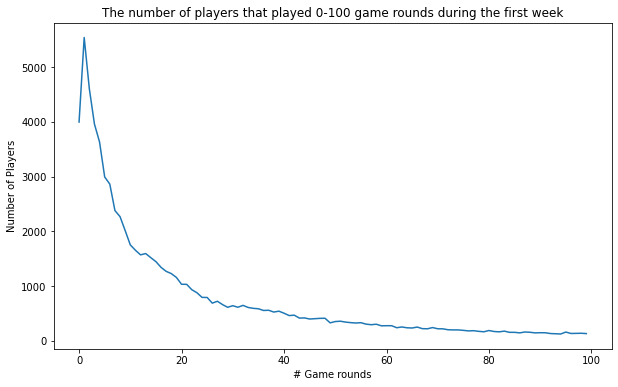

In [36]:
ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

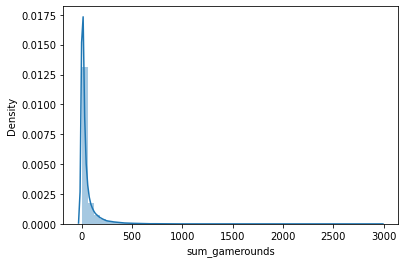

In [37]:
sns.distplot(df["sum_gamerounds"])

* You can see that the number of users who have installed the game and never run it is significant.
* Some users can see how addicted (?) to the game after running it enough in the first week of installation.
* In the video game industry, **1-day retention** is a key metric for how fun and addicting a game is.
* With a high **1-day retention**, you can easily grow your subscriber base.

In [38]:
# Look at the average of 1-day retention. 
df["retention_1"].mean()

0.4452144409455803

* You can see that less than half of the users played the game again the day after installation.

In [40]:
# Look at the average of 1-day retention by group.
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

* Simply comparing the averages between groups, the number of plays is higher when the gate is 30 (44.8%) than when it is 40 (44.2%).
* It's a small difference, but it will affect retention and, ultimately, long-term returns.
* By the way, can this alone convince you that putting the gate at 30 is better than putting it at 40?

In [41]:
# Look at the average of 7-day retention.
df["retention_7"].mean()

0.1860557945624695

In [42]:
# Look at the average of 7-day retention by group.
df.groupby("version")["retention_7"].mean()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

* Simply comparing the means between groups, the survival rate is higher with the gate 30 (19.0%) than with the gate 40 (18.2%).
* It's a small difference, but it will affect retention and, ultimately, long-term returns.
* The difference is larger when the 7th is compared to the 1st. But does this alone convince me that putting the gate at 30 is better than putting it at 40?

-----

#### Bootstrapping 


<AxesSubplot:ylabel='Density'>

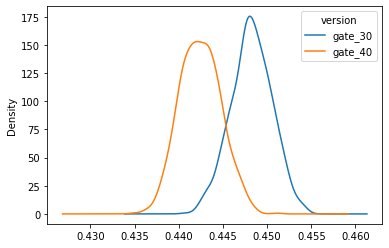

In [43]:
# Create a list of bootstrapped means values for each AB group.
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Convert list to DataFrame.
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

* The above two distributions express the bootstrap uncertainty that 1 day retention can have for both groups AB.
* Although small, there seems to be evidence of a difference.
* Let's plot the % difference to take a closer look.

High probability of 1-day retention when the gate is at level 30: 0.958


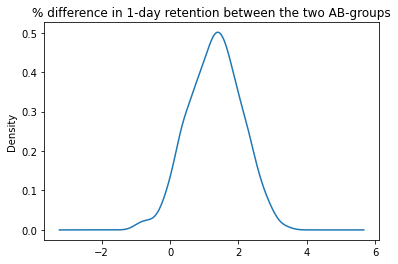

In [45]:
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

print('High probability of 1-day retention when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

* In the diagram above, the most likely % difference is around 1%-2%, with 95% of the distribution above 0%, favoring gates at level 30.
* Bootstrap analysis shows that the daily retention rate is more likely to be higher when the gate is at level 30.
* However, most players haven't reached level 30 yet, since players only played for one day.
* That is, most users would not have an effect on retention depending on whether the gate was at 30 or not.
* After playing for a week, you should also check the 7-day retention as more players reach levels 30 and 40.

In [46]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

* As with 1-day retention, 7-day retention is lower at gate level 40 (18.2%) than at gate level 30 (19.0%).
* This difference is larger than the 1-day retention, probably because more players had time to open the first gate.
* Full 7-day retention is lower than Full 1-day retention. This is because fewer people play the game a week after installation than a day after installation.
* As before, let's use bootstrap analysis to see if there are any differences between the AB groups.

High probability of 7-day retention when the gate is at level 30: 1.0


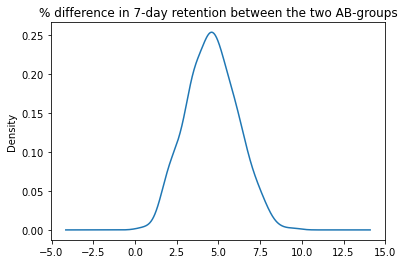

In [47]:
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
boot_7d = pd.DataFrame(boot_7d)

boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

print('High probability of 7-day retention when the gate is at level 30:',(boot_7d['diff'] > 0).mean())

* Bootstrap results indicate that there is strong evidence for a higher 7-day retention when the gate is at level 30 than when it is at level 40.
* Bottom line, gates should not be moved from level 30 to level 40 to increase retention

-----

#### T-test

In [48]:
df_30 = df[df["version"] == "gate_30"] 
print(df_30.shape)
df_30.tail()

(44699, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False
90186,9999710,gate_30,28,True,False


In [49]:
df_40 = df[df["version"] == "gate_40"] 
print(df_40.shape)
df_40.tail()

(45489, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [50]:
from scipy import stats
# Independent Sample T-Test (2 Sample T-Test)

tTestResult = stats.ttest_ind(df_30['retention_1'], df_40['retention_1'])

tTestResultDiffVar = stats.ttest_ind(df_30['retention_1'], df_40['retention_1'], equal_var=False)

tTestResult

Ttest_indResult(statistic=1.7871153372992439, pvalue=0.07392220630182522)

In [51]:
tTestResult = stats.ttest_ind(df_30['retention_7'], df_40['retention_1'])
tTestResultDiffVar = stats.ttest_ind(df_30['retention_7'], df_40['retention_1'], equal_var=False)

tTestResult

Ttest_indResult(statistic=-84.48321935747556, pvalue=0.0)

-----

##### T Score
- A large t-score means that the two groups are different.
- A small t-score means that the two groups are similar.

##### P-values
- The p-value is 0.05 at the 5% level.
- Small p-values are recommended. This means that the data did not happen by chance.
- For example, a p-value of 0.01 means that there is only a 1% chance that the result is by chance.
- In most cases, a p-value of the 0.05 (5%) level is taken as a reference. In this case, it is said to be statistically significant.

[T-test Reference](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/)

* Looking at the above analysis results, it can be seen that there is no significant difference in retention_1 between the two groups and there is a significant difference in retention_7.
* Again, it is not accidental that gate30 has a higher retention_7 than gate40.
* In other words, the gate at 30 is a better choice for retention 7 dimensions than at 40.

-----

#### chi-square
* In fact, the t-test was analyzed with retention set to 0,1.

* However, retention is actually a categorical variable.
A chi-square test is a better method than this method.

* The chi-square test is also used to test whether a categorical random variable 𝑋 is independent or correlated with another categorical random variable 𝑌.
* When the chi-square test is used to check for independence, it is called the chi-square test of independence.

* If two random variables are independent, then the 𝑌 distribution for 𝑋=0 and the 𝑌 distribution for 𝑋=1 must be the same.
* In other words, the distribution of Y is the same for both versions 30 and 40.
* Therefore, if the chi-square test is adopted with the null hypothesis that the sample sets come from the same probability distribution, the two random variables are independent.
* If rejected, then the two random variables are correlated.
* In other words, if the chi-square test result is rejected, the value of retention will change depending on whether the gate is 30 or 40.

* If each 𝑌 distribution according to the value of 𝑋 is given in the form of a two-dimensional table (contingency table), the difference between the distribution in the case of independence and the actual y sample size is calculated as a test statistic.
* If this value is large enough, 𝑋 and 𝑌 are correlated.

In [52]:
df.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222937707836,2294941,20034,8501
gate_40,227857702576,2333530,20119,8279


In [53]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44699,44699,44699,44699
gate_40,45489,45489,45489,45489


### Create a contingency table for each version.
||retention_1=False|retention_1=True|
|------|---|---|
|version=gate30|(44699-20034)|20034|
| version=gate40|(45489-20119)|20119|



||retention_7=False|retention_7=True|
|------|---|---|
|version=gate30|(44699-8501)|8501|
| version=gate40|(45489-8279)|8279|



In [54]:
import scipy as sp
obs1 = np.array([[20119, (45489-20119)], [20034, (44699-20034)]])
sp.stats.chi2_contingency(obs1)

(3.1698355431707994,
 0.07500999897705699,
 1,
 array([[20252.35970417, 25236.64029583],
        [19900.64029583, 24798.35970417]]))

* The significance probability of the chi-square independent test is 7.5%.
* That is, 𝑋 and 𝑌 cannot be said to be correlated.

In [55]:
obs2 = np.array([[8501, (44699-8501)], [8279, (45489-8279)]])
sp.stats.chi2_contingency(obs2)

(9.915275528905669,
 0.0016391259678654423,
 1,
 array([[ 8316.50796115, 36382.49203885],
        [ 8463.49203885, 37025.50796115]]))

* The significance probability of the chi-square independent test is 0.1%.
* In other words, we can say that 𝑋 and 𝑌 are correlated.
* Retention after 7 days is correlated with whether the gate is at 30 or 40.
* Gate must be kept at 30 to maintain retention after 7 days.

-----

### conclusion
The gate should be kept at 30.

### More to think about
* Actually, there are various metrics to consider other than retention.
* In-app purchases, number of games played, referrer due to friend invitation, etc.
* In this data, only retention is given, so we focused on one thing and analyzed it.
* It is important for service operators and planners to determine really important metrics and evaluate test results based on them.